# Sprint Challenge
## *Data Science Sprint 13*

After a sprint of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). The data is sampled for you to something more manageable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. 

## Challenge Objectives
Successfully complete all these objectives to earn full credit. 

**Successful completion is defined as passing all the unit tests in each objective.**  

There are 8 total possible points in this sprint challenge. 


There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on Yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

____

# Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu. 

3) **Comment out the cell that generates a pyLDAvis visual in objective 4 (see instructions in that section).** 
____

### Part 0: Import Necessary Packages
For this section, you will need to import:
- `spacy` 
- `Pandas`
- `Seaborn`
- `Matplotlib`
- `NearestNeighbors`
- `Pipeline` 
- `TfidfVectorizer`
- `KneighborsClassifier`
- `GridSearchCV`
- `corpora`
- `LdaModel`
- `gensim`
- `re`

> **Note: This assignment is optimized to work with these specific packages. You can use import different packages, but note that this may affect how CodeGrade works, and may cause CodeGrade to fail.**

In [1]:
!python -m spacy download en_core_web_sm 

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-20 16:15:05.481595: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 346 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
# YOUR CODE HERE
import re
import spacy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.svm import LinearSVC

import gensim
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [3]:
# Visible Testing
assert pd.__package__ == 'pandas'




### Part 0: Import Data

In [4]:

# Load reviews from URL
data_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_4/unit1_nlp/review_sample.json'
data = pd.read_json(data_url, lines=True)
# Import data into a DataFrame named df
df = pd.DataFrame(data)
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


In [5]:
df.shape[0]

10000

In [6]:
# Visible Testing
assert isinstance(df, pd.DataFrame), 'df is not a DataFrame. Did you import the data into df?'
assert df.shape[0] == 10000, 'DataFrame df has the wrong number of rows.'

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- Accept one document at a time
- Return a list of tokens

You are free to use any method you have learned this week.

In [7]:
# Optional: Consider using spaCy in your function. The spaCy library can be imported by running this cell.
# A pre-trained model (en_core_web_sm) has been made available to you in the CodeGrade container.
# If you DON'T need use the en_core_web_sm model, you can comment it out below.

nlp = spacy.load('en_core_web_sm')

In [8]:
def tokenize(doc):
  doc = nlp(doc)
  lemma_list = [token.lemma_.lower().strip() for token in doc if (not token.is_stop) 
                                                                and (not token.is_punct)
                                                                and (not token.is_digit)
                                                                and (not token.like_num)
                                                                and (token.lemma_.strip()!="") 
                                                                and (len(token.lemma_.strip())>1)]
  return lemma_list

In [9]:
'''Testing'''
assert isinstance(tokenize(df.sample(n=1)["text"].iloc[0]), list), "Make sure your tokenizer function accepts a single document and returns a list of tokens!"

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews (i.e. create a doc-term matrix).
    * Name that doc-term matrix `dtm`

In [10]:
def get_vect(doc):
  vect = TfidfVectorizer()
  dtm = vect.fit_transform(doc)
  # dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names_out())

  return dtm

In [11]:
%%time
# YOUR CODE HERE
df['tokens'] = df['text'].apply(tokenize)

CPU times: user 4min 37s, sys: 1.78 s, total: 4min 39s
Wall time: 4min 51s


In [12]:
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,tokens
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,"[beware, fake, fake, fake, small, business, lo..."
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA,"[come, lunch, togo, service, quick, staff, fri..."
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA,"[vegas, dozen, time, step, foot, circus, circu..."
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ,"[go, night, close, street, party, good, actual..."
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA,"[star, bad, price, lunch, senior, pay, eat, ho..."


In [13]:
type(df.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [47]:
vect = TfidfVectorizer(max_df=0.75, min_df=0.25)
vect.fit(df.text)
dtm = vect.transform(df.text)


2. Write a fake review. Assign the text of the review to an object called `fake_review`. 
3. Query the fake review for the 10 most similar reviews, print the text of the reviews. 
    - Given the size of the dataset, use `NearestNeighbors` model for this. Name the model `nn`.

In [48]:
# Create and fit a NearestNeighbors model named "nn"

nn = NearestNeighbors(n_neighbors=10).fit(dtm)
nn

NearestNeighbors(n_neighbors=10)

In [49]:
'''Testing.'''
assert nn.__module__ == 'sklearn.neighbors._unsupervised', ' nn is not a NearestNeighbors instance.'
assert nn.n_neighbors == 10, 'nn has the wrong value for n_neighbors'

In [50]:
# Create a fake review and find the 10 most similar reviews

fake_review = "Boy oh boy did I really hate the female and male characters. The plot was awful and the humor only came from the mistakes made in the film's conception and implimentation."

fake_vect = vect.transform([fake_review]).toarray()

distances, indecies = nn.kneighbors(fake_vect)

In [51]:
print(indecies)
print(distances)

[[1695  990 4619 2860 9943 5186 7883 4719   62 5797]]
[[0.4649618  0.57552446 0.5908195  0.59111223 0.60224997 0.61024673
  0.62635698 0.63902774 0.67438729 0.68308689]]


In [52]:
print(f'The 10 documents most similar to my fake_review: {indecies[0]}')

The 10 documents most similar to my fake_review: [1695  990 4619 2860 9943 5186 7883 4719   62 5797]


In [53]:
# i=0
for index in indecies[0]:
  # i+=1
  print(df['text'][index])
  # print(i)

The hatch burger was in a word "disgusting" 
The Caesar salad was sub par. Total disappointment. The only thing I truly enjoyed was the bottled ginger beer by fentimams.
I was a walk in patient today and everybody including the receptionist was awesome.  My lab tech was Stephany and she was so happy and cheerful and she painlessly did my blood work.  It was a great experience.  In and out in less than 30 minutes.
Awful experience. Screaming kids. Long wait. Don't feel like I was taken care of in an efficient manner.
Was dieing for a salad, walked in and ordered their Mediterranean salad, and oh yum! Hit the spot
Fun indoor zoo and the insectarium was awesome.. don't do the botanical garden in August everything is dead
Small delivery order was 50+ minutes late. Chicken sandwich was miserably cold, soaked in mayo, and the coleslaw was warm and the fries were steamed to mush.
If you want to eat delicious pizza and other Italian foods in a club environment, this is the place to go. 4 stars

In [54]:
# Visible Testing
assert isinstance(fake_review, str), "Did you write a review in the correct data type?"

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a pipeline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier.
    - Use that pipeline to train a model to predict the `stars` feature (i.e. the labels). 
    - Use that pipeline to predict a star rating for your fake review from Part 2. 



2. Create a parameter dict including `one parameter for the vectorizer` and `one parameter for the model`. 
    - Include 2 possible values for each parameter
    - **Use `n_jobs` = 1** 
    - Due to limited computational resources on CodeGrader `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE.`
    
    
3. Train the entire pipeline with a GridSearch
    - Name your GridSearch object as `gs`

In [57]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.75, min_df=0.25, max_features=1000)
svm = LinearSVC()

In [56]:
# YOUR CODE HERE
pipe = Pipeline([
    ('vect', tfidf),
    ('clf', svm)   
])

In [24]:
# 20 fits == 30+ minutes
# most gs project searches should run in about 10-15
y = df['stars']
X = df['text']

In [25]:
parameters = {
    'vect__ngram_range': ((1,1), (1,2)),  
    'clf__C': (0.5, 1)             
}

gs = GridSearchCV(pipe, parameters, cv=5, n_jobs=1, verbose=1, error_score='raise')
gs.fit(X, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(max_features=1000,
                                                        stop_words='english')),
                                       ('clf', LinearSVC())]),
             n_jobs=1,
             param_grid={'clf__C': (0.5, 1),
                         'vect__ngram_range': ((1, 1), (1, 2))},
             verbose=1)

In [26]:
# Visible Testing
prediction = gs.predict(["This is your prediction statement."])[0]
assert prediction in df.stars.values, 'You gs object should be able to accept raw text within a list. Did you include a vectorizer in your pipeline?'

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Set num_topics to `5`
    - Name your LDA model `lda`
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

When you instantiate your LDA model, it should look like this: 

```python
lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics = num_topics,
               passes=1
              )

```

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

## Note about  pyLDAvis

**pyLDAvis** is the Topic modeling package that we used in class to visualize the topics that LDA generates for us.

You are welcomed to use pyLDAvis if you'd like for your visualization. However, **you MUST comment out the code that imports the package and the cell that generates the visualization before you submit your notebook to CodeGrade.** 

Although you should leave the print out of the visualization for graders to see (i.e. comment out the cell after you run it to create the viz). 

### 1. Estimate a LDA topic model of the review text

* Use the `tokenize` function you created earlier to create tokens.
* Create an `id2word` object. 
> Hint: Use `corpora.Dictionary`
* Create a `corpus` object.
> Hint: Use `id2word.doc2bow`
* Instantiate an `lda` model. 

>> Remember to read the LDA docs for more information on the various class attributes and methods available to you in the LDA model: https://radimrehurek.com/gensim/models/ldamodel.html

In [ ]:
# !wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
# !pip install -r requirements.txt

In [28]:
# import pyLDAvis
# import pyLDAvis.gensim 

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


In [29]:
# Do not change this value 
num_topics = 5

In [30]:
id2word = corpora.Dictionary(df['tokens'])

In [31]:
corpus = [id2word.doc2bow(doc_toke) for doc_toke in df['tokens']]

In [ ]:
# YOUR CODE HERE
lda=LdaModel(corpus=corpus,
             id2word=id2word,
             random_state=723812,
             num_topics=num_topics,
             passes=1)

#### Testing

In [33]:
# Visible Testing

assert lda.get_topics().shape[0] == 5, 'Did your model complete its training? Did you set num_topics to 5?'


#### 2. Create 1-2 visualizations of the results. Assign one of the visualizations to a variable called `visual_plot`.


In [ ]:
# Use a ploting tool of your choice to visualize your results. 
# pyLDAvis.enable_notebook()
# visual_plot = pyLDAvis.gensim.prepare(lda, corpus, id2word)
# visual_plot

In [85]:
dir(gs)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_

In [100]:
y = gs.predict(X)

Text(0.5, 1.0, 'relative')

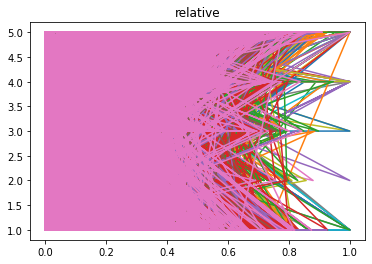

In [106]:
fig, visual_plot = plt.subplots()

visual_plot.plot(dtm,gs.predict(X))
visual_plot.set_title('relative')

In [107]:
# Visible Testing
assert visual_plot.__module__ == 'matplotlib.axes._subplots', "You must create and assign to visual_plot a visualization"
